In [2]:
#資料檔路徑(資料檔：i_filepath，完成檔：o_filepath，內文說明檔：c_filepath)
filepath = '/content/MyGoogleDrive/My Drive/Colab Notebooks/Python-for-Titanic/Ch10/'
i_filepath = filepath 
o_filepath = filepath + '完成檔/'
c_filepath = filepath + '內文說明檔/'

# 10-1 機器學習前準備

#1. 資料取得

In [4]:
from google.colab import drive
drive.mount('/content/MyGoogleDrive')
import pandas as pd
df=pd.read_csv(i_filepath + 'Iris.csv')
df=df.drop('Id', axis=1)
df.head()

Drive already mounted at /content/MyGoogleDrive; to attempt to forcibly remount, call drive.mount("/content/MyGoogleDrive", force_remount=True).


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#2. 資料處理


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df = df.drop_duplicates() #刪除重複列
df.reset_index(drop=True) #將列索引重新編號
s = {'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2 }
df['Species']=df['Species'].map(s)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  147 non-null    float64
 1   SepalWidthCm   147 non-null    float64
 2   PetalLengthCm  147 non-null    float64
 3   PetalWidthCm   147 non-null    float64
 4   Species        147 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.9 KB


#3. 探索性資料分析


In [7]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


#4. 機器學習做資料分析

# 10-2 機器學習實作

# 挑選模型：匯入 K- 平均法模型

In [8]:
from sklearn.cluster import KMeans

# 學習訓練：建立並訓練 K-平均法模型

In [9]:
df_X = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]

In [10]:
k = 1
km = KMeans(n_clusters = k)   

In [11]:
km.fit(df_X)         

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=1, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

# 測試評估

In [12]:
print('分群準確性:',km.inertia_)

分群準確性: 663.895238095238


In [13]:
s = []
for k in range(1,15):
    km = KMeans(n_clusters=k)
    km.fit(df_X)
    s.append(km.inertia_)
print(s)

[663.895238095238, 151.77145833333336, 77.91989035087718, 56.64237065018315, 45.816421929824564, 38.380978808131445, 34.1150969785575, 29.771330051212402, 27.730401211361738, 25.771261585636587, 24.236889472455648, 22.68941452991453, 21.258278047116285, 19.7686452991453]


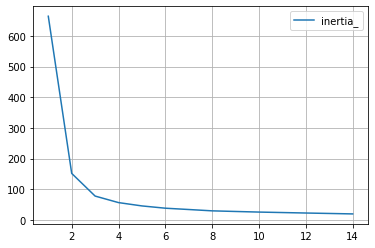

In [14]:
# 看視覺化圖表決定參數K值
df_kmeans = pd.DataFrame()
df_kmeans['inertia_'] = s
df_kmeans.index = list(range(1,15))   
df_kmeans.plot(grid=True)

In [15]:
k=3                      
km=KMeans(n_clusters=k)  
km.fit(df_X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [16]:
print('分群的預測結果：')
pred = km.fit_predict(df_X) 
pred 

分群的預測結果：


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

# 決定模型

# 進行分群預測

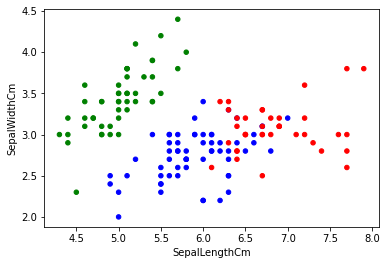

In [17]:
df1 = df_X.copy()
df1['pred'] = pred
c = {0:'r', 1:'g', 2:'b'}
df1['colors'] = df1['pred'].map(c)
df1.plot(kind='scatter', x='SepalLengthCm',y='SepalWidthCm',c=df1['colors'])

# 給一朵鳶尾花的4個特徵值：「花萼長度 6.6公分、花萼寬度 3.1公分、花瓣長度 5.2公分、花寬度 2.4公分」

In [18]:
new = [[6.6,3.1,5.2,2.4]]
v=km.predict(new)
print('預測結果為：', v)

預測結果為： [0]
